In [43]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx
import random

# Making Dictionary

In [45]:
words = {}
with open('text-2.txt') as f:
    for line in f:
        # removing All nan alphabetic and numeric characters
        edited_line =  re.sub(r'[^\w\s]', ' ', line)
        for word in edited_line.split():
            if word in words.keys():
                words[word] = words[word] + 1
            else:
                words[word] = 0 + 1
words

{'note': 6,
 'this': 1010,
 'book': 1,
 'can': 520,
 'be': 1684,
 'found': 129,
 'from': 1179,
 'the': 10955,
 'website': 1,
 'httpwww': 1,
 'literature': 1,
 'orgworkscharlesdarwinorigin': 1,
 'n': 5,
 'phamdo': 1,
 'origin': 48,
 'of': 7841,
 'species': 1506,
 'by': 1426,
 'charles': 9,
 'darwin': 3,
 'full': 29,
 'title': 1,
 'on': 1294,
 'means': 103,
 'natural': 374,
 'selection': 395,
 'or': 1316,
 'preservation': 23,
 'favoured': 19,
 'races': 48,
 'in': 4165,
 'struggle': 80,
 'for': 1151,
 'life': 309,
 'table': 4,
 'contents': 2,
 'preface': 2,
 'introduction': 10,
 'chapter': 91,
 '1': 4,
 'variation': 94,
 'under': 230,
 'domestication': 39,
 '2': 6,
 'nature': 262,
 '3': 3,
 'existence': 74,
 '4': 2,
 '5': 2,
 'laws': 67,
 '6': 5,
 'difficulties': 38,
 'theory': 132,
 '7': 4,
 'instinct': 59,
 '8': 3,
 'hybridism': 5,
 '9': 3,
 'imperfection': 9,
 'geological': 96,
 'record': 50,
 '10': 2,
 'succession': 36,
 'organic': 146,
 'beings': 121,
 '11': 2,
 'geographical': 46,
 

# Making Dataframe

In [46]:
df = pd.DataFrame(list(words.items()), columns=['word', 'frequency'])
df

,word,frequency
0,note,6
1,this,1010
2,book,1
3,can,520
4,be,1684
...,...,...
8051,zooids,2
8052,corals,1
8053,medus,1
8054,individuality,1


# Sorting Dataframe (Part1)

In [47]:
df = df.sort_values("frequency", ascending=False)
df['rank'] = df['frequency'].rank(ascending=False)
df

,word,frequency,rank
7,the,10955,1.0
15,of,7841,2.0
79,and,4567,3.0
30,in,4165,4.0
91,to,3720,5.0
...,...,...,...
4859,degenerated,1,6498.0
4863,coarse,1,6498.0
4866,abnormally,1,6498.0
4872,adduce,1,6498.0


# Drawing Charts

### Simple Plots

<AxesSubplot: xlabel='rank'>

ERROR! Session/line number was not unique in database. History logging moved to new session 107


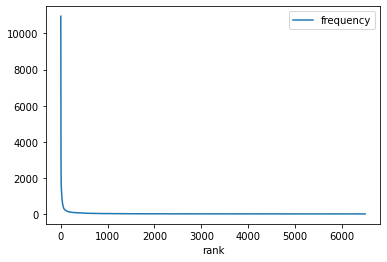

In [56]:
df.plot(x ='rank', y='frequency', kind='line')

<AxesSubplot: xlabel='rank'>

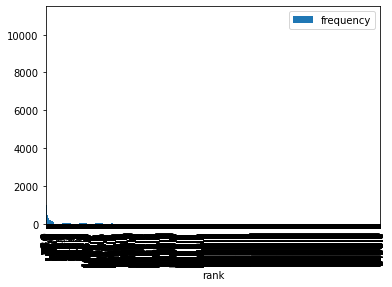

In [57]:
df.plot(x ='rank', y='frequency', kind='bar')

<AxesSubplot: xlabel='frequency'>

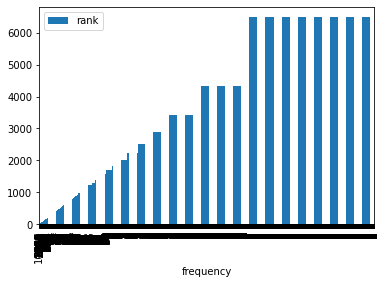

In [64]:
df.plot(x ='frequency', y='rank', kind='bar')

<AxesSubplot: xlabel='rank', ylabel='frequency'>

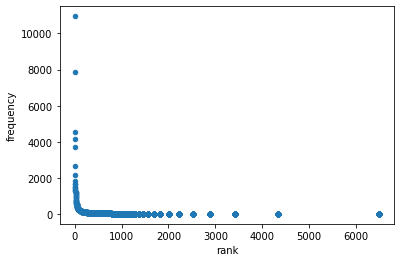

In [58]:
df.plot(x ='rank', y='frequency', kind='scatter')

### Double Log Plots

xlog finished
ylog finished


Text(0.5, 1.0, 'Log-Log Plot')

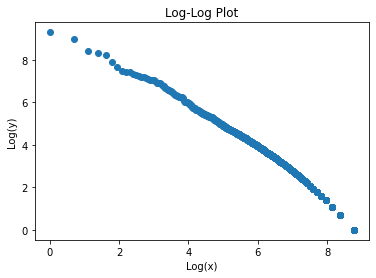

In [62]:
#perform log transformation on both x and y
xlog = np.log(df['rank'].to_numpy())
print('xlog finished')
ylog = np.log(df['frequency'].to_numpy())
print('ylog finished')

#create log-log plot
plt.scatter(xlog, ylog)

# adding lables for plot
plt.xlabel('Log(x)')
plt.ylabel('Log(y)')
plt.title('Log-Log Plot')

Text(0.5, 1.0, 'Log-Log Plot')

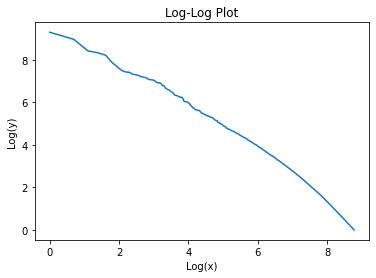

In [63]:
#create log-log plot
plt.plot(xlog, ylog)

# adding lables for plot
plt.xlabel('Log(x)')
plt.ylabel('Log(y)')
plt.title('Log-Log Plot')

Text(0.5, 1.0, 'Log-Log Plot')

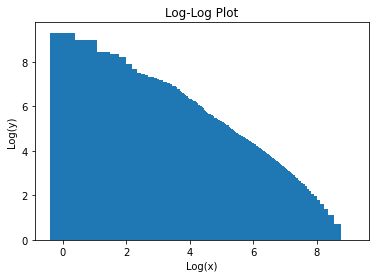

In [66]:
#create log-log plot
plt.bar(xlog, ylog)

# adding lables for plot
plt.xlabel('Log(x)')
plt.ylabel('Log(y)')
plt.title('Log-Log Plot')

# Making Graphs

### Small World Graph

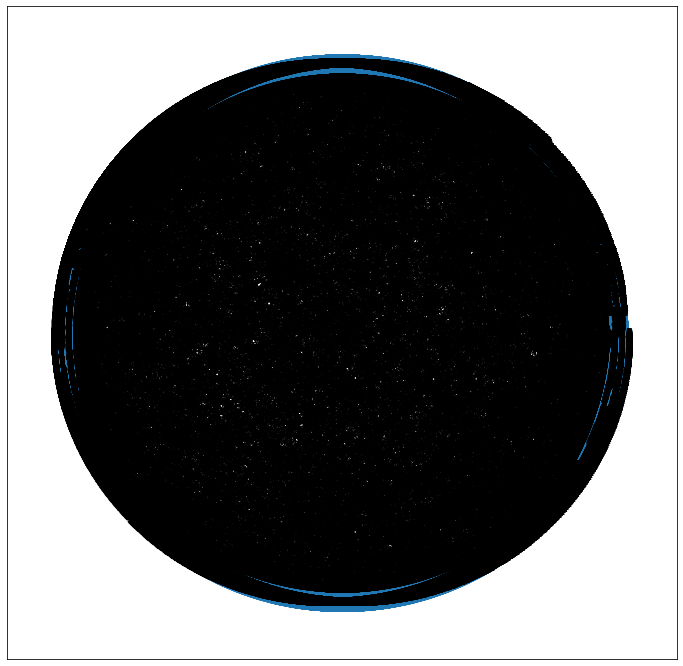

In [75]:
words_number = len(df)
# if we want to have equal nodes and edges number,
# each node, must be connected to its 2 nearest neighbor

G = nx.watts_strogatz_graph(n=words_number, k=2, p=0.5)
# if we want a connected graph we should use this:
# G = nx.connected_watts_strogatz_graph(n=10, m=4, p=0.5, t=20)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

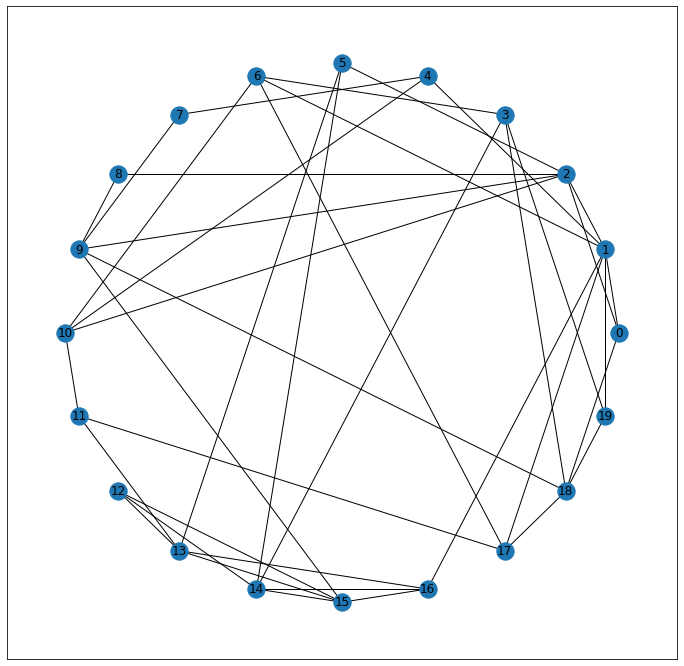

In [76]:
# Simple Example oF Correct Small World Graph
G = nx.watts_strogatz_graph(n=20, k=4, p=0.5)
# if we want a connected graph we should use this:
# G = nx.connected_watts_strogatz_graph(n=10, m=4, p=0.5, t=20)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

### Random Graph

###### Random Graph With N Nodes & M Edges

KeyboardInterrupt: 

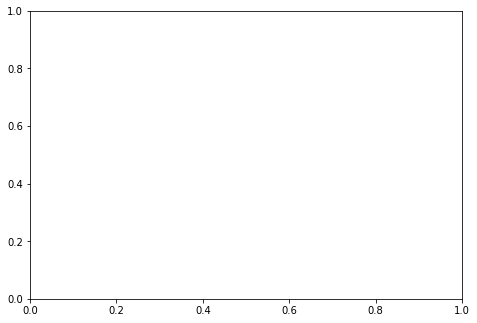

In [77]:
words_number = len(df)
G = nx.gnm_random_graph(words_number, words_number)

plt.figure(figsize = (12, 12))
nx.draw(G)

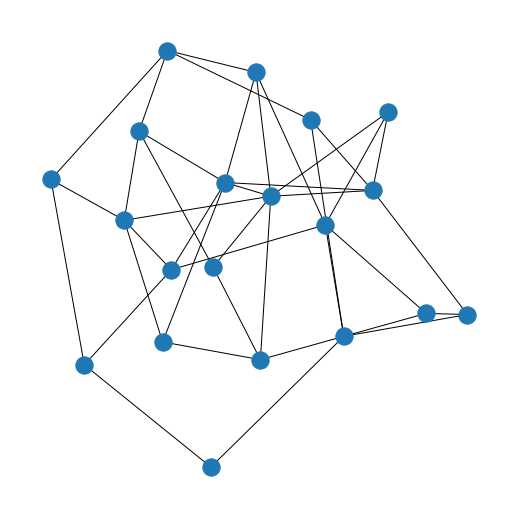

In [86]:
# Simple Example oF Correct Random Graph
G = nx.gnm_random_graph(20, 40)

plt.figure(figsize = (7, 7))
nx.draw(G)

###### Random Graph With N Nodes & M% Edge Probability

In [87]:
words_number = len(df)
G = nx.gnp_random_graph(words_number, words_number)

plt.figure(figsize = (12, 12))
nx.draw(G)

KeyboardInterrupt: 

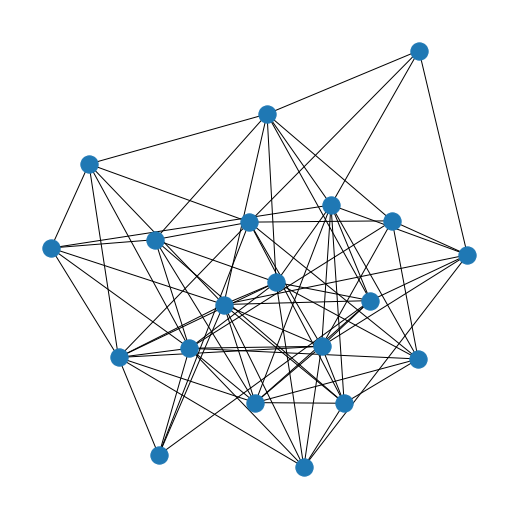

In [97]:
# Simple Example oF Correct Random Graph
G = nx.gnp_random_graph(20, 0.35)

plt.figure(figsize = (7, 7))
nx.draw(G)

###### Random Graph With N Nodes With Degree M

7


KeyboardInterrupt: 

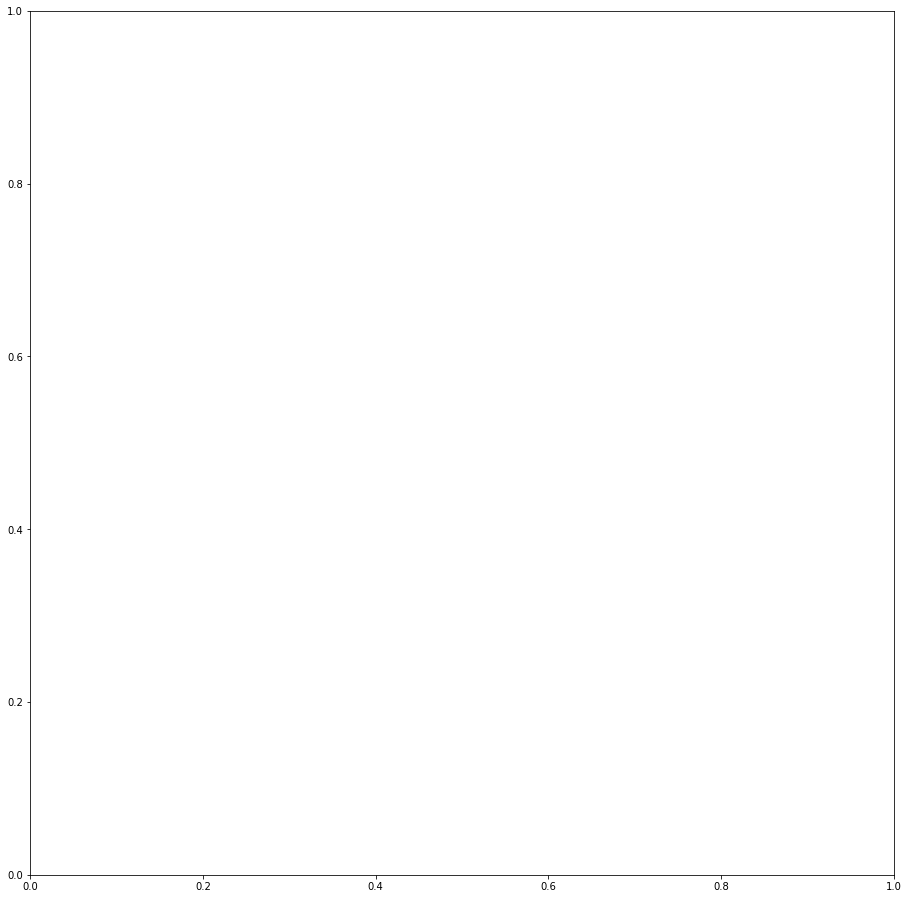

In [109]:
words_number = len(df)
m = random.randint(1, int(words_number/1000))
print(m)
G = nx.random_regular_graph(m, words_number)

plt.figure(figsize = (12, 12))
nx.draw(G)

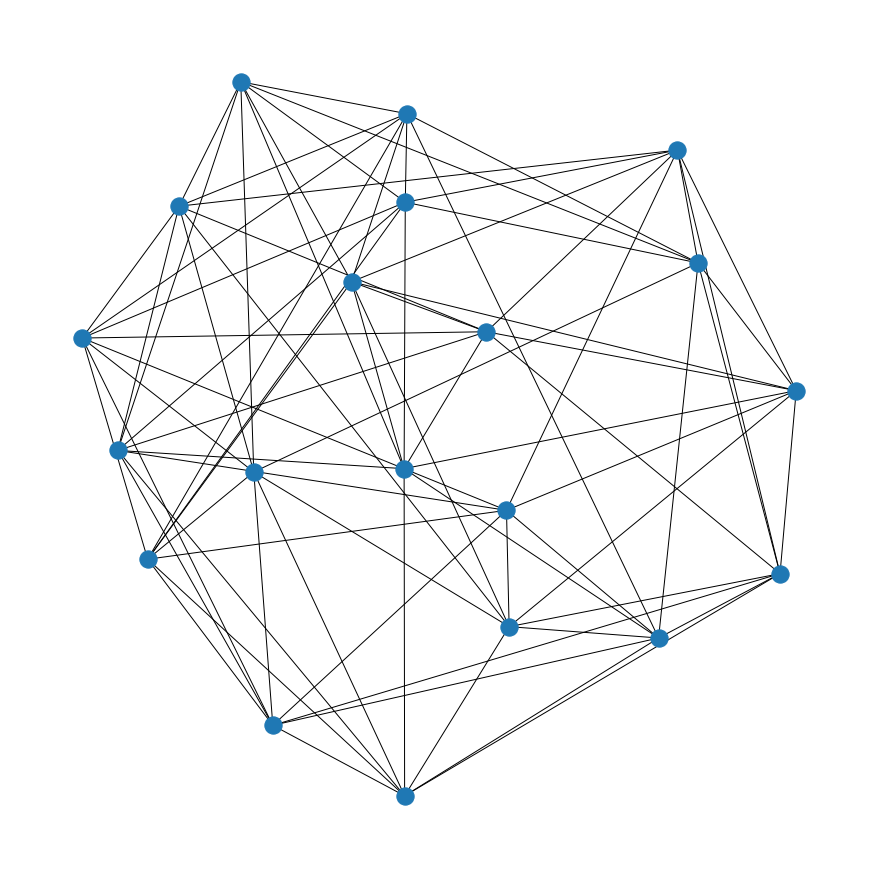

In [113]:
G = nx.random_regular_graph(8, 20)

plt.figure(figsize = (12, 12))
nx.draw(G)

### Scale Free Graph with N Nodes

KeyboardInterrupt: 

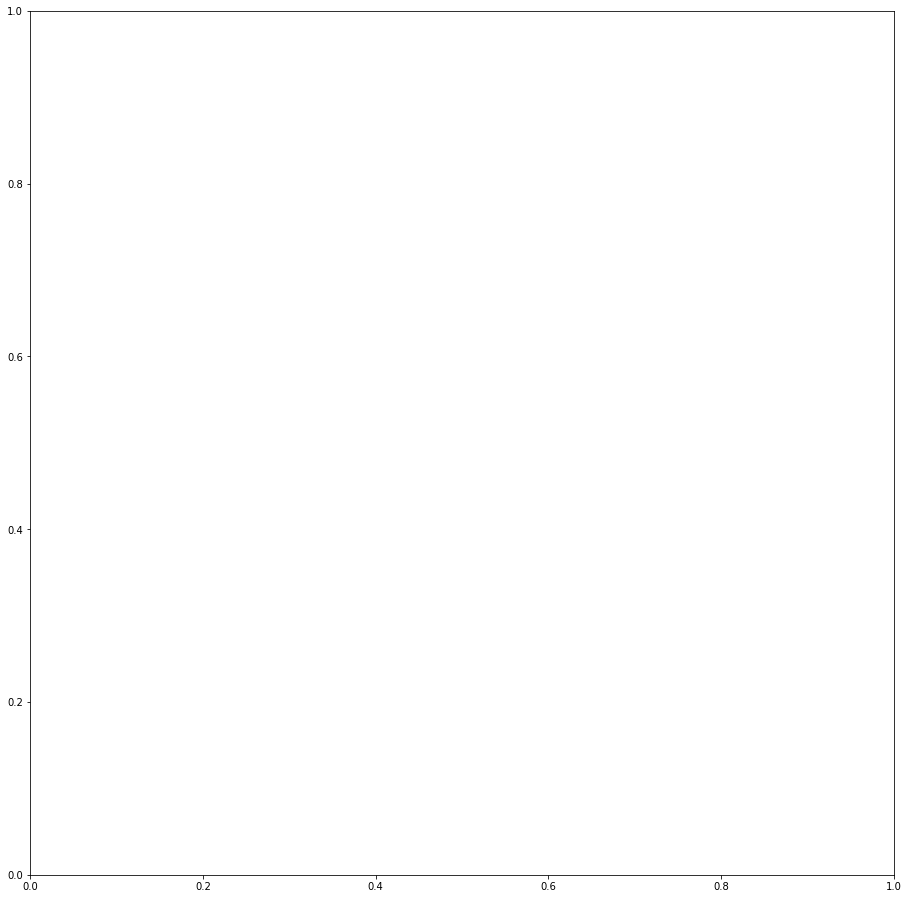

In [115]:
words_number = len(df)
G = nx.scale_free_graph(words_number)

plt.figure(figsize = (12, 12))
nx.draw(G)

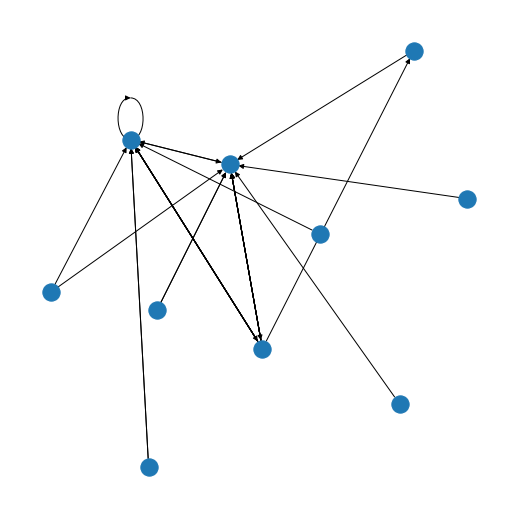

In [123]:
G = nx.scale_free_graph(10)

plt.figure(figsize = (7, 7))
nx.draw(G)